In [6]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [7]:
img = cv.imread('images/cameraman.jpg', 0)

In [8]:
zeroMatrix = np.zeros_like(img)

In [9]:
laplacian_filter = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]], dtype=np.float32)

In [10]:
zeroMatrix[:3, :3] = laplacian_filter

In [11]:
filter_fft = np.fft.fftshift(np.fft.fft2(zeroMatrix))
image_fft = np.fft.fftshift(np.fft.fft2(img))


result_fft = filter_fft * image_fft


result_img = np.fft.ifft2(np.fft.ifftshift(result_fft))
result_img = np.abs(result_img)


In [12]:
filter_spectrum = np.abs(filter_fft)
convolved_img = cv.filter2D(img, -1, laplacian_filter)

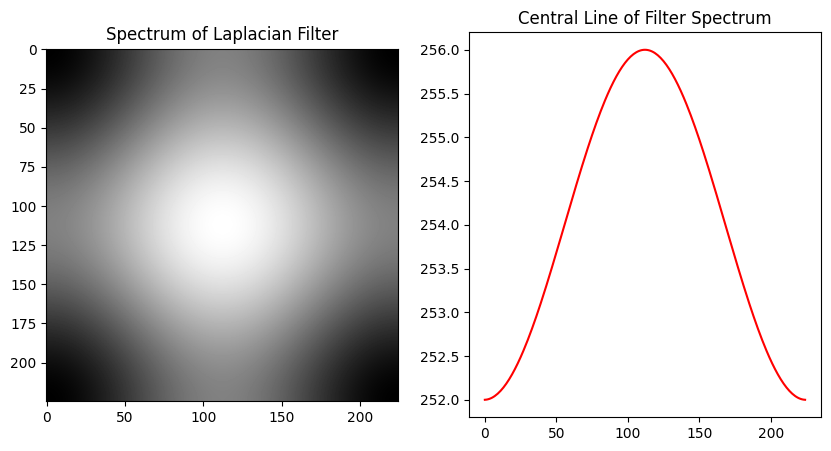

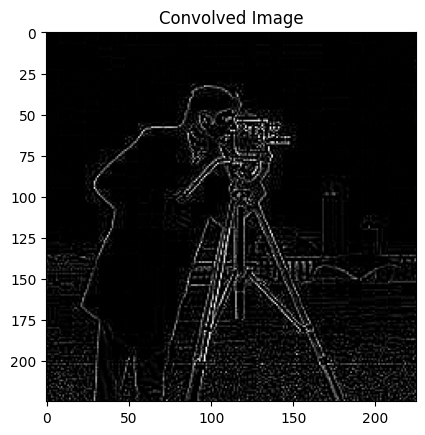

In [13]:

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(np.log(1 + filter_spectrum), cmap='gray')
plt.title("Spectrum of Laplacian Filter")

# رسم خط مرکزی
plt.subplot(1, 2, 2)
plt.plot(filter_spectrum[filter_spectrum.shape[0] // 2, :], color='red')
plt.title("Central Line of Filter Spectrum")
plt.show()

# --- پ) کانولوشن فیلتر لاپلاس و تصویر ---
convolved_img = cv.filter2D(img, -1, laplacian_filter)

plt.imshow(convolved_img, cmap='gray')
plt.title("Convolved Image")
plt.show()

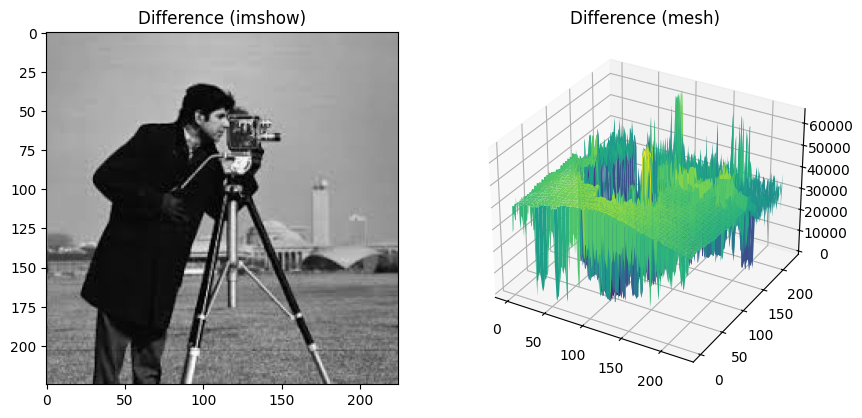

In [14]:

filter_spectrum = np.abs(filter_fft)
difference = result_img - convolved_img


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(difference, cmap='gray')
plt.title("Difference (imshow)")


ax = plt.subplot(1, 2, 2, projection='3d')
X, Y = np.meshgrid(range(difference.shape[1]), range(difference.shape[0]))
ax.plot_surface(X, Y, difference, cmap='viridis')
plt.title("Difference (mesh)")
plt.show()
